In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import joblib

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../dataSets/Time management data.csv")
df.head()

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,10,11,12,13,14,15,16,17,Scores,Score Range
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree,48.0,45+
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree,42.0,35-45
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree,38.0,35-45
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree,36.0,35-45
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree,34.0,25-35


In [2]:
df.isna().sum()

Number          0
Age             0
Gender          0
Nationality     0
Program         0
Course          0
English         6
Academic       22
Attendance      6
6               2
7               0
8               4
9               7
10              1
11              2
12              3
13              0
14              1
15              0
16              2
17              1
Scores         14
Score Range    14
dtype: int64

In [3]:
df = df.drop("Number",axis=1)
df = df.drop("Nationality",axis=1)
df = df.drop("Scores",axis=1)

In [4]:
df.columns

Index(['Age', 'Gender', 'Program', 'Course', 'English', 'Academic',
       'Attendance', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', 'Score Range'],
      dtype='object')

In [5]:
#deleting the duplicate values
print(df.dtypes)
print(df.shape)

df = df.dropna()
df.isna().sum().sum()

df.duplicated()
df.drop_duplicates()

df.shape

Age            object
Gender         object
Program        object
Course         object
English        object
Academic       object
Attendance     object
6              object
7              object
8              object
9              object
10             object
11             object
12             object
13             object
14             object
15             object
16             object
17             object
Score Range    object
dtype: object
(125, 20)


(91, 20)

In [6]:
df.head()

,Age,Gender,Program,Course,English,Academic,Attendance,6,7,8,9,10,11,12,13,14,15,16,17,Score Range
1,26-30,M,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,Agree,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree,35-45
3,21-25,M,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,Disagree,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree,35-45
4,21-25,M,PM,Business,60%~70%,50%~59%,S1,Neither,Disagree,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree,25-35
5,21-25,M,PM,Law/Legal studies,60%~70%,60%~70%,S0,Agree,Neither,Agree,Strong Agree,Disagree,Disagree,Strong Agree,Agree,Strong Agree,Strong Agree,Strong Disagree,Strong Agree,35-45
6,21-25,M,PM,Art and Design,60%~70%,60%~70%,S0,Disagree,Agree,Agree,Neither,Agree,Neither,Neither,Strong Disagree,Disagree,Strong Disagree,Strong Disagree,Neither,45+


In [7]:
print(df['Age'].unique())
print(df['Gender'].unique())
print(df['Program'].unique())
print(df['Course'].unique())
print(df['English'].unique())
print(df['Academic'].unique())
print(df['Attendance'].unique())
print(df['6'].unique())
print(df['7'].unique())
print(df['8'].unique())
print(df['9'].unique())
print(df['10'].unique())
print(df['11'].unique())
print(df['12'].unique())
print(df["13"].unique())
print(df["14"].unique())
print(df["15"].unique())
print(df["16"].unique())
print(df["17"].unique())
print(df["Score Range"].unique())

['26-30' '21-25' '18-20' '<18' '>36' '31-35']
['M' 'F']
['PM' 'IYO' 'FC' 'Language']
['Science and engineering' 'Law/Legal studies' 'Business' 'Art and Design'
 'Computing' 'Social Sciences and Humanities' 'Media and Communications']
['60%~70%' '>70%' '50%~59%' '40%~49%']
['50%~59%' '60%~70%' '40%~49%' '>70%' '<40%']
['S3' 'S0' 'S1' 'S2' 'S4']
['Strong Agree' 'Disagree' 'Neither' 'Agree' 'Strong Disagree']
['Agree' 'Disagree' 'Neither' 'Strong Agree' 'Strong Disagree']
['Neither' 'Agree' 'Strong Disagree' 'Disagree' 'Strong Agree']
['Disagree' 'Agree' 'Neither' 'Strong Agree' 'Strong Disagree']
['Agree' 'Disagree' 'Neither' 'Strong Agree' 'Strong Disagree']
['Neither' 'Agree' 'Disagree' 'Strong Disagree' 'Strong Agree']
['Disagree' 'Neither' 'Strong Agree' 'Agree' 'Strong Disagree']
['Strong Disagree' 'Neither' 'Agree' 'Disagree' 'Strong Agree']
['Neither' 'Strong Agree' 'Disagree' 'Agree' 'Strong Disagree']
['Agree' 'Neither' 'Disagree' 'Strong Agree' 'Strong Disagree']
['Neither' 'Di

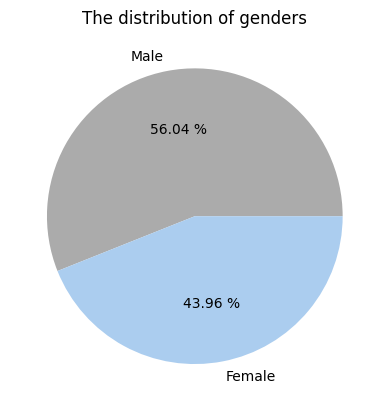

In [8]:
df["Gender"]

male = df.loc[df["Gender"] == "M"].count()[0]
# print(male)
female = df.loc[df["Gender"] == "F"].count()[0]

plt.pie([male,female],colors=["#ababab","#abcdef"],labels=["Male","Female"],autopct="%.2f %%")
plt.title("The distribution of genders")
plt.show()

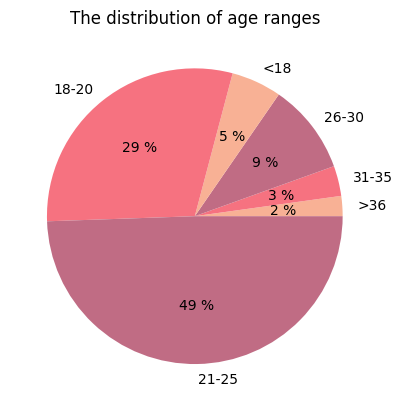

In [9]:
df["Age"]


seniors = df.loc[df["Age"] == ">36"].count()[0]
adults = df.loc[df["Age"] == "31-35"].count()[0]
young = df.loc[df["Age"] == "26-30"].count()[0]
underage = df.loc[df["Age"] == "<18"].count()[0]
teen = df.loc[df["Age"] == "18-20"].count()[0]
youngster = df.loc[df["Age"] == "21-25"].count()[0]



plt.pie([seniors,adults,young,underage,teen,youngster],colors=["#F8B195","#F67280","#C06C84"],labels=[">36","31-35", "26-30","<18","18-20","21-25"],autopct="%d %%")  # or "%.2f %%"
plt.title("The distribution of age ranges")
plt.show()

In [10]:
categorial_features = ['Age','Gender','Program','Course','English','Academic','Attendance','6','7','8','9','10','11','12','13','14','15','16','17','Score Range']

In [11]:
from ctgan import CTGAN

In [12]:
ctgan = CTGAN(verbose=True)
ctgan.fit(df,categorial_features,epochs=50)

Gen. (0.52) | Discrim. (0.04): 100%|██████████| 50/50 [00:14<00:00,  3.38it/s] 


In [13]:
samples = ctgan.sample(5000)

In [14]:
print(samples.shape)

samples = samples.dropna()
samples.isna().sum().sum()

samples.duplicated()
samples.drop_duplicates()

samples.shape

(5000, 20)


(5000, 20)

In [16]:
csv_file_path = "../dataSets/synthetic_data.csv"
samples.to_csv(csv_file_path,index=False)

In [17]:
frames = [df, samples]
 
result = pd.concat(frames)
# display(result)
print(result.shape)

(5091, 20)


In [18]:
result.head()
result.shape

(5091, 20)

In [19]:
option_scores6 = {
    'Strong Agree': 1,
    'Agree': 2,
    'Neither': 3,
    'Disagree': 4,
    'Strong Disagree': 5
}

option_scores7 = {
    'Strong Agree': 5,
    'Agree': 4,
    'Neither': 3,
    'Disagree': 2,
    'Strong Disagree': 1
}


option_scores8 = {
    'Strong Agree': 5,
    'Agree': 4,
    'Neither': 3,
    'Disagree': 2,
    'Strong Disagree': 1
}


option_scores9 = {
    'Strong Agree': 1,
    'Agree': 2,
    'Neither': 3,
    'Disagree': 4,
    'Strong Disagree': 5
}


option_scores10 = {
    'Strong Agree': 5,
    'Agree': 4,
    'Neither': 3,
    'Disagree': 2,
    'Strong Disagree': 1
}

option_scores11 = {
    'Strong Agree': 1,
    'Agree': 2,
    'Neither': 3,
    'Disagree': 4,
    'Strong Disagree': 5
}

option_scores12 = {
    'Strong Agree': 1,
    'Agree': 2,
    'Neither': 3,
    'Disagree': 4,
    'Strong Disagree': 5
}
option_scores13 = {
    'Strong Agree': 1,
    'Agree': 2,
    'Neither': 3,
    'Disagree': 4,
    'Strong Disagree': 5
}


option_scores14 = {
    'Strong Agree': 5,
    'Agree': 4,
    'Neither': 3,
    'Disagree': 2,
    'Strong Disagree': 1
}

option_scores15 = {
    'Strong Agree': 1,
    'Agree': 2,
    'Neither': 3,
    'Disagree': 4,
    'Strong Disagree': 5
}

option_scores16 = {
    'Strong Agree': 1,
    'Agree': 2,
    'Neither': 3,
    'Disagree': 4,
    'Strong Disagree': 5
}

option_scores17 = {
    'Strong Agree': 5,
    'Agree': 4,
    'Neither': 3,
    'Disagree': 2,
    'Strong Disagree': 1
}

In [20]:
columns_to_sum = result.columns[7:19]
print(columns_to_sum)

Index(['6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'], dtype='object')


In [21]:
column_score_mapping = {
    '6': option_scores6,
    '7': option_scores7, 
    '8': option_scores8,
    '9': option_scores9,
    '10': option_scores10,
    '11': option_scores11,
    '12': option_scores12,
    '13': option_scores13,
    '14': option_scores14,
    '15': option_scores15,
    '16': option_scores16,
    '17': option_scores17,# Replace with the actual name of your dictionary for Column7
    # Repeat for other columns
}

# Iterate through each column and apply the corresponding scores
for column in columns_to_sum:
    result[column] = result[column].map(column_score_mapping[column])

# Sum the scores for each row
result['Total Score'] = result[columns_to_sum].sum(axis=1)

# Display the DataFrame with the total scores
print(result[['Total Score']])
result

      Total Score
1              38
3              36
4              36
5              35
6              45
...           ...
4995           37
4996           40
4997           33
4998           38
4999           29

[5091 rows x 1 columns]


,Age,Gender,Program,Course,English,Academic,Attendance,6,7,8,...,10,11,12,13,14,15,16,17,Score Range,Total Score
1,26-30,M,PM,Science and engineering,60%~70%,50%~59%,S3,1,4,3,...,4,3,4,5,3,2,3,2,35-45,38
3,21-25,M,PM,Law/Legal studies,60%~70%,60%~70%,S0,4,2,4,...,2,2,3,3,3,3,4,4,35-45,36
4,21-25,M,PM,Business,60%~70%,50%~59%,S1,3,2,3,...,2,3,3,3,3,4,3,4,25-35,36
5,21-25,M,PM,Law/Legal studies,60%~70%,60%~70%,S0,2,3,4,...,2,4,1,2,5,1,5,5,35-45,35
6,21-25,M,PM,Art and Design,60%~70%,60%~70%,S0,4,4,4,...,4,3,3,5,2,5,5,3,45+,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18-20,M,PM,Business,50%~59%,40%~49%,S1,2,3,4,...,5,1,4,3,3,3,4,2,35-45,37
4996,21-25,M,PM,Business,>70%,50%~59%,S0,3,2,5,...,5,3,2,4,2,3,4,2,35-45,40
4997,18-20,M,PM,Business,60%~70%,50%~59%,S2,4,2,3,...,2,2,3,5,1,3,2,3,25-35,33
4998,31-35,M,PM,Business,>70%,60%~70%,S0,4,2,3,...,4,3,3,4,4,3,2,4,25-35,38


In [22]:
csv_file_path = "../dataSets/tmpSynthetic1.csv"
result.to_csv(csv_file_path,index=False)


In [23]:
conditions = [
    (result['Total Score'] >= 45),
    (result['Total Score'] >= 35) & (result['Total Score'] < 45),
    (result['Total Score'] >= 25) & (result['Total Score'] < 35),
]

choices = ['45+', '35-45', '25-35']
result['Score Range'] = np.select(conditions, choices, default='Other')

In [24]:
option_scores6 = {
    1:'Strong Agree',
    2:'Agree',
    3:'Neither',
    4:'Disagree',
    5:'Strong Disagree'
}
option_scores7 = {
    5:'Strong Agree',
    4:'Agree',
    3:'Neither',
    2:'Disagree',
    1:'Strong Disagree'
}
option_scores8 = {
    5:'Strong Agree',
    4:'Agree',
    3:'Neither',
    2:'Disagree',
    1:'Strong Disagree'
}

option_scores9 = {
    1:'Strong Agree',
    2:'Agree',
    3:'Neither',
    4:'Disagree',
    5:'Strong Disagree'
}
option_scores10 = {
    5:'Strong Agree',
    4:'Agree',
    3:'Neither',
    2:'Disagree',
    1:'Strong Disagree'
}

option_scores11 = {
    1:'Strong Agree',
    2:'Agree',
    3:'Neither',
    4:'Disagree',
    5:'Strong Disagree'
}

option_scores12 = {
    1:'Strong Agree',
    2:'Agree',
    3:'Neither',
    4:'Disagree',
    5:'Strong Disagree'
}
option_scores13 = {
    1:'Strong Agree',
    2:'Agree',
    3:'Neither',
    4:'Disagree',
    5:'Strong Disagree'
}
option_scores14 = {
    5:'Strong Agree',
    4:'Agree',
    3:'Neither',
    2:'Disagree',
    1:'Strong Disagree'
}

option_scores15 = {
    1:'Strong Agree',
    2:'Agree',
    3:'Neither',
    4:'Disagree',
    5:'Strong Disagree'
}

option_scores16 = {
    1:'Strong Agree',
    2:'Agree',
    3:'Neither',
    4:'Disagree',
    5:'Strong Disagree'
}
option_scores17 = {
    5:'Strong Agree',
    4:'Agree',
    3:'Neither',
    2:'Disagree',
    1:'Strong Disagree'
}

In [25]:
column_score_mapping = {
    '6': option_scores6,
    '7': option_scores7, 
    '8': option_scores8,
    '9': option_scores9,
    '10': option_scores10,
    '11': option_scores11,
    '12': option_scores12,
    '13': option_scores13,
    '14': option_scores14,
    '15': option_scores15,
    '16': option_scores16,
    '17': option_scores17,# Replace with the actual name of your dictionary for Column7
    # Repeat for other columns
}
for column in columns_to_sum:
    result[column] = result[column].map(column_score_mapping[column])

In [26]:
result.head()

,Age,Gender,Program,Course,English,Academic,Attendance,6,7,8,...,10,11,12,13,14,15,16,17,Score Range,Total Score
1,26-30,M,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,Agree,Neither,...,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree,35-45,38
3,21-25,M,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,Disagree,Agree,...,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree,35-45,36
4,21-25,M,PM,Business,60%~70%,50%~59%,S1,Neither,Disagree,Neither,...,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree,35-45,36
5,21-25,M,PM,Law/Legal studies,60%~70%,60%~70%,S0,Agree,Neither,Agree,...,Disagree,Disagree,Strong Agree,Agree,Strong Agree,Strong Agree,Strong Disagree,Strong Agree,35-45,35
6,21-25,M,PM,Art and Design,60%~70%,60%~70%,S0,Disagree,Agree,Agree,...,Agree,Neither,Neither,Strong Disagree,Disagree,Strong Disagree,Strong Disagree,Neither,45+,45


In [27]:

result = result.drop("Total Score",axis = 1)

csv_file_path = "../dataSets/tmpSynthetic.csv"
result.to_csv(csv_file_path,index=False)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
col_list_obj = result.select_dtypes(include=["object"]).columns.to_list()
print(col_list_obj)

['Age', 'Gender', 'Program', 'Course', 'English', 'Academic', 'Attendance', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', 'Score Range']


In [30]:
def labelEncoding(result, columns):
    encoders = {}
    for col in columns:
        le = preprocessing.LabelEncoder().fit(result[col])
        result[col] = le.transform(result[col])
        encoders[col] = le
    return result, encoders

In [31]:
def label_encode_columns_w_fit_encoders(result, columns, encoders):
    for col in columns:
        le = encoders.get(col)
        result[col] = le.transform(result[col])
    return result

In [32]:
joblib.dump(label_encode_columns_w_fit_encoders, "fit.joblib")

['fit.joblib']

In [33]:
result, label_encoders = labelEncoding(result, col_list_obj)
print(result.head())

   Age  Gender  Program  Course  English  Academic  Attendance  6  7  8  9  \
1    2       1        3       5        2         1           3  3  0  2  1   
3    1       1        3       3        2         2           0  1  1  0  0   
4    1       1        3       1        2         1           1  2  1  2  2   
5    1       1        3       3        2         2           0  0  2  0  3   
6    1       1        3       0        2         2           0  1  0  0  2   

   10  11  12  13  14  15  16  17  Score Range  
1   0   2   1   4   2   0   2   1            1  
3   1   0   2   2   2   2   1   0            1  
4   1   2   2   2   2   1   2   0            1  
5   1   1   3   0   3   3   4   3            1  
6   0   2   2   4   1   4   4   2            2  


In [34]:
result.dtypes

Age            int32
Gender         int32
Program        int32
Course         int32
English        int32
Academic       int32
Attendance     int32
6              int32
7              int32
8              int32
9              int32
10             int32
11             int32
12             int32
13             int32
14             int32
15             int32
16             int32
17             int32
Score Range    int32
dtype: object

In [35]:
X = result.drop(columns = "Score Range",axis=1)
y = result["Score Range"]

In [36]:
print(X)
print(y)

      Age  Gender  Program  Course  English  Academic  Attendance  6  7  8  9  \
1       2       1        3       5        2         1           3  3  0  2  1   
3       1       1        3       3        2         2           0  1  1  0  0   
4       1       1        3       1        2         1           1  2  1  2  2   
5       1       1        3       3        2         2           0  0  2  0  3   
6       1       1        3       0        2         2           0  1  0  0  2   
...   ...     ...      ...     ...      ...       ...         ... .. .. .. ..   
4995    0       1        3       1        1         0           1  0  2  0  2   
4996    1       1        3       1        3         1           0  2  1  3  4   
4997    0       1        3       1        2         1           2  1  1  2  2   
4998    3       1        3       1        3         2           0  1  1  2  0   
4999    1       1        3       1        1         2           1  2  4  2  3   

      10  11  12  13  14  1

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
def pred_metrics(model, X_train, y_train, X_test, y_test):
    print('----- Train -----')
    y_pred_train = model.predict(X_train)
    print('Misclassified samples: {}'.format((y_train != y_pred_train).sum()))
    print('Accuracy: {:.2f}'.format(accuracy_score(y_train, y_pred_train)))
    print('Precision: {:.2f}'.format(precision_score(y_train, y_pred_train, average='weighted')))
    print('Recall: {:.2f}'.format(recall_score(y_train, y_pred_train, average='weighted')))
    print('F1: {:.2f}'.format(f1_score(y_train, y_pred_train, average='weighted')))
    
    print('\n----- Test -----')
    y_pred_test = model.predict(X_test)
    print('Misclassified samples: {}'.format((y_test != y_pred_test).sum()))
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_test)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_test, average='weighted')))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_test, average='weighted')))
    print('F1: {:.2f}'.format(f1_score(y_test, y_pred_test, average='weighted')))
    
    return y_pred_test

In [39]:
dectree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=17)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=17)

In [40]:
pred_metrics(dectree, X_train, y_train, X_test, y_test)

----- Train -----
Misclassified samples: 931
Accuracy: 0.77
Precision: 0.74
Recall: 0.77
F1: 0.71

----- Test -----
Misclassified samples: 210
Accuracy: 0.79
Precision: 0.76
Recall: 0.79
F1: 0.74


C:\Users\tatev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tatev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1, 1, 1, ..., 1, 1, 1])

In [41]:
svm_m = svm.SVC().fit(X_train, y_train)

In [42]:
pred_metrics(svm_m, X_train, y_train, X_test, y_test)

----- Train -----
Misclassified samples: 982
Accuracy: 0.76
Precision: 0.81
Recall: 0.76
F1: 0.66

----- Test -----


C:\Users\tatev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Misclassified samples: 229
Accuracy: 0.78
Precision: 0.60
Recall: 0.78
F1: 0.68


C:\Users\tatev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1, 1, 1, ..., 1, 1, 1])

In [43]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, max_leaf_nodes=17, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=17, random_state=0)

In [44]:
pred_metrics(rfc, X_train, y_train, X_test, y_test)

----- Train -----
Misclassified samples: 986
Accuracy: 0.76
Precision: 0.81
Recall: 0.76
F1: 0.65

----- Test -----
Misclassified samples: 227
Accuracy: 0.78
Precision: 0.82
Recall: 0.78
F1: 0.68


C:\Users\tatev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tatev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1, 1, 1, ..., 1, 1, 1])

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# pred_metrics(knn, X_train, y_train, X_test, y_test)

In [49]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [50]:
pred_metrics(gb, X_train, y_train, X_test, y_test)

----- Train -----
Misclassified samples: 365
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1: 0.90

----- Test -----
Misclassified samples: 110
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1: 0.88


array([1, 1, 1, ..., 1, 1, 1])

In [51]:
joblib.dump(gb, "best_model.joblib")

['best_model.joblib']

In [52]:
joblib.dump(label_encoders, "encoders.joblib")

['encoders.joblib']

In [53]:
input_data = {'Age': '21-25',
 'Gender': 'F',
 'Program': 'PM',
 'Course': 'Computing',
 'English': '60%~70%',
 'Academic' : '60%~70%',
 'Attendance' : 'S0',
 '6'  : 'Neither',
 '7'  : 'Neither',
 '8'  : 'Agree',
 '9'  : 'Neither',
 '10' : 'Neither',
 '11' : 'Neither',
 '12' : 'Agree',
 '13' : 'Disagree',
 '14' : 'Strong Disagree',
 '15' : 'Strong Disagree',
 '16' : 'Neither',
 '17' : 'Strong Disagree',
 'Score Range' : '35-45'
}
input_data

{'Age': '21-25',
 'Gender': 'F',
 'Program': 'PM',
 'Course': 'Computing',
 'English': '60%~70%',
 'Academic': '60%~70%',
 'Attendance': 'S0',
 '6': 'Neither',
 '7': 'Neither',
 '8': 'Agree',
 '9': 'Neither',
 '10': 'Neither',
 '11': 'Neither',
 '12': 'Agree',
 '13': 'Disagree',
 '14': 'Strong Disagree',
 '15': 'Strong Disagree',
 '16': 'Neither',
 '17': 'Strong Disagree',
 'Score Range': '35-45'}

In [54]:
input_col_list = col_list_obj[:-1]
input_col_list

['Age',
 'Gender',
 'Program',
 'Course',
 'English',
 'Academic',
 'Attendance',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17']

In [55]:
input_df = pd.DataFrame([input_data])
input_encoded = label_encode_columns_w_fit_encoders(result=input_df, columns=col_list_obj, encoders=label_encoders)
input_encoded
# input_df

# tmp = input_encoded.drop('Score Range', axis=1)


,Age,Gender,Program,Course,English,Academic,Attendance,6,7,8,9,10,11,12,13,14,15,16,17,Score Range
0,1,0,3,2,2,2,0,2,2,0,2,2,2,0,1,4,4,2,4,1


In [56]:
# input = input_encoded[result.columns.difference(['Score Range'])]
# # input = result.columns.difference(['Score Range'])
# input


df_restored = input_encoded.drop('Score Range', axis=1)
df_restored

,Age,Gender,Program,Course,English,Academic,Attendance,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,3,2,2,2,0,2,2,0,2,2,2,0,1,4,4,2,4


In [57]:
# input = input_encoded[result.columns.difference(['Score Range'])]
# # input = result.columns.difference(['Score Range'])
# input


df_restored = input_encoded.drop('Score Range', axis=1)
df_restored

,Age,Gender,Program,Course,English,Academic,Attendance,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,3,2,2,2,0,2,2,0,2,2,2,0,1,4,4,2,4


In [58]:
model = joblib.load("best_model.joblib")
predicted_label = model.predict(df_restored)
predicted_label

array([0])

In [59]:
def decode_label(column, label, encoders):
    le = encoders.get(column)
    decoded_label = le.inverse_transform([label])

    return decoded_label[0]

In [60]:
joblib.dump(decode_label, "decode_label.joblib")

['decode_label.joblib']

In [61]:
decoded_label = decode_label('Score Range', predicted_label[0], label_encoders)
decoded_label

'25-35'

(-1.0999999997626002,
 1.0999999973815782,
 -1.099999999162651,
 1.0999999999601262)

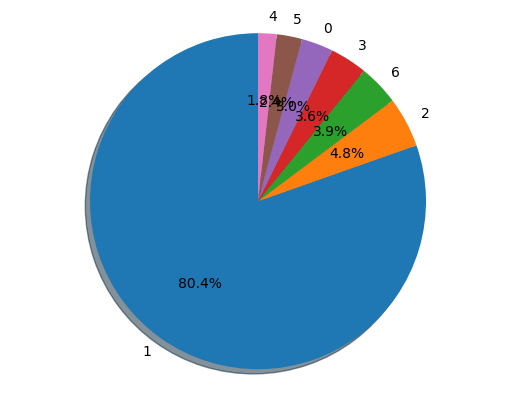

In [62]:
course_counts = result['Course'].value_counts()
fig, ax = plt.subplots()
ax.pie(course_counts, labels=course_counts.index, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.



(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5')])

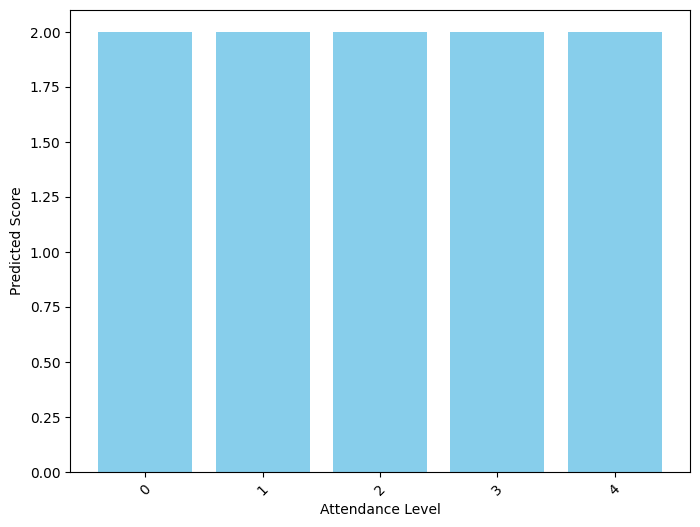

In [63]:
plt.figure(figsize=(8, 6))
plt.bar(result['Attendance'], result['Score Range'], color='skyblue')
plt.xlabel('Attendance Level')
plt.ylabel('Predicted Score')
#plt.title('Attendance vs Predicted Scores')
plt.xticks(rotation=45)
